##LAB 02: GRADIENT DESCENT

repeat until convergence {

$\theta_j:=\theta_j-\alpha \frac{\partial}{\partial \theta_j}J(\theta)$

}
alpha là learning rate

Ta có $X\in R^{N \times M+1}$ trong đó N là số samples, M là số features có trong một sample, $y \in R^{N \times 1}$ là target value, $W \in R^{M+1 \times1}$

Ta có: 
$$L(W)=(XW-Y)^2$$ 

1. Batch Gradient Descent
$$J(W)=\frac{1}{2N}\sum_{i=1}^N(x_iW-y)^2$$
Gradient Descent:
$$W:=W-\alpha\frac{1}{N}X^T(XW-y)$$

2. Stochastic Gradient Descent
$$J(W)=\frac{1}{2}(x_iW-y_i)^2$$
Gradient Descent
$$W:=W-\alpha x_i^T(x_iW-y_i)^2$$
Nên shuffle X sau mỗi epoch

3. Mini Gradient Descent
$$J(W)=\frac{1}{2N_{i:i+n}}(X_{i:i+n}W-y_{i:i+n})^2$$
Gradient Descent
$$W:=W-\alpha \frac{1}{N_{i:i+n}}X_{i:i+n}^T(X_{i:i+n}W-y_{i:i+n})^2$$
Nên shuffle X sau mỗi epoch



In [ ]:
#thư viện
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
X_0 = np.random.rand(1000, 1)
y = 4 + 3 * X_0 + .2*np.random.randn(1000, 1)
y.shape

(1000, 1)

#BGD

In [ ]:
#Khởi tạo lr
np.random.seed(1)
lr= 0.0001  
#Khởi tạo W
W=np.asarray([[2], [1]])
#Thêm một cột cho bias
X=np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis=1) 
print("shape của X là:", X.shape)
print()
#GD
for i in range(1000000):#gồm 10 vòng lặp
  prediction=np.matmul(X,W)
  loss=prediction-y
  gradient=np.matmul(X.T,loss)
  W=W-lr*(1/X.shape[0])*gradient
  if i % 1000 == 0:
      loss = np.mean(np.square(np.matmul(X,W)-y))
      print("Loss at iter {}: {}".format(i, loss))
loss=np.mean(np.square(np.matmul(X,W)-y))
print("Final loss: ", loss)
print("Final W: ", W)




shape của X là: (1000, 2)

Loss at iter 0: 9.431575836573694
Loss at iter 1000: 7.3361721177668215
Loss at iter 2000: 5.710317759652196
Loss at iter 3000: 4.448765196687618
Loss at iter 4000: 3.469858057710201
Loss at iter 5000: 2.7102432051679535
Loss at iter 6000: 2.120768069605496
Loss at iter 7000: 1.663297595730284
Loss at iter 8000: 1.308244669322606
Loss at iter 9000: 1.032654098413741
Loss at iter 10000: 0.8187160696629082
Loss at iter 11000: 0.6526128131604694
Loss at iter 12000: 0.5236237870611349
Loss at iter 13000: 0.4234314348833767
Loss at iter 14000: 0.34558255715544717
Loss at iter 15000: 0.28507041648615394
Loss at iter 16000: 0.23801051368934856
Loss at iter 17000: 0.20138903861592536
Loss at iter 18000: 0.17286770567344778
Loss at iter 19000: 0.15063233541787793
Loss at iter 20000: 0.1332753765450255
Loss at iter 21000: 0.11970476054839556
Loss at iter 22000: 0.10907318658215857
Loss at iter 23000: 0.10072325710312398
Loss at iter 24000: 0.09414491134316767
Loss at i

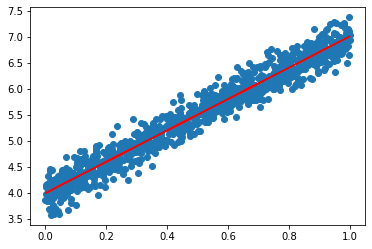

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_0,y)
plt.plot(X_0,np.matmul(X,W),"r")

#SGD

In [ ]:
#Khởi tạo lr
lr=0.0001
#Khởi tạo W
W=np.asarray([[2], [1]])
#Thêm một cột cho bias
X=np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis=1) 
print("shape của X là:", X.shape)
print()
for i in range(10000):#gồm 100000 vòng lặp
  rd_id = np.random.permutation(X.shape[0])
  for j in rd_id:
    X_1=X[j,:].reshape(1,-1)
    error=np.matmul(X_1,W)-y[j,:].reshape(1,-1)
    W=W-lr*np.matmul(X_1.T,error)
  if i % 1000 == 0:
      loss = np.mean(np.square(np.matmul(X,W)-y))
      print("Loss at iter {}: {}".format(i, loss))
loss=np.mean(np.square(np.matmul(X,W)-y))
print("Loss: ", loss)
print("W: ", W)






shape của X là: (1000, 2)

Loss at iter 0: 7.337976553710698
Loss at iter 1000: 0.03876223567504053
Loss at iter 2000: 0.03876217674806265
Loss at iter 3000: 0.038762176758319916
Loss at iter 4000: 0.038762177508257493
Loss at iter 5000: 0.03876217882468608
Loss at iter 6000: 0.03876217682948556
Loss at iter 7000: 0.03876217693458283
Loss at iter 8000: 0.03876218042768465
Loss at iter 9000: 0.03876218254585771
Loss:  0.03876217684301681
W:  [[3.99576577]
 [3.02034511]]


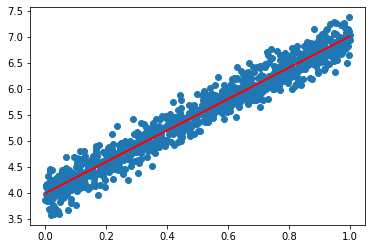

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_0,y)
plt.plot(X_0,np.matmul(X,W),"r")

#mini GD

In [ ]:

#Khởi tạo W
lr=0.0001
W=np.asarray([[1.0], [2.0]])
#Thêm một cột cho bias
X=np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis=1) 
first_X=X.copy()
first_y=y.copy()
print("shape của X là:", X.shape)
print()
for i in range(200000):#gồm 100000 vòng lặp
  indices = np.random.permutation(X.shape[0])
  first_X=first_X[indices]
  first_y=first_y[indices]

  temp=128
  z=0
  for j in range(0,X.shape[0],128):
    z+=1
    X_1=first_X[j:temp,:]
    prediction=np.matmul(X_1,W)
    loss=prediction-first_y[j:temp,:]
    gradient=np.matmul(X_1.T,loss)
    W=W-lr*(1/X_1.shape[0])*gradient

    temp=temp+ 128 if X.shape[0]-temp>=128 else X.shape[0]
  if i % 1000 == 0:
      print(z)
      loss = np.mean(np.square(np.matmul(X,W)-y))
      print("Loss at iter {}: {}".format(i, loss))
loss=np.mean(np.square(np.matmul(X,W)-y))
print("Loss: ", loss)
print("W: ", W)






shape của X là: (1000, 2)

8
Loss at iter 0: 12.399449591567079
8
Loss at iter 1000: 1.6755602420282263
8
Loss at iter 2000: 0.26620975220560833
8
Loss at iter 3000: 0.07988675902507966
8
Loss at iter 4000: 0.05426191944635998
8
Loss at iter 5000: 0.04985728157089937
8
Loss at iter 6000: 0.04834567396782798
8
Loss at iter 7000: 0.04730952164580467
8
Loss at iter 8000: 0.046422342281072206
8
Loss at iter 9000: 0.04563232571405138
8
Loss at iter 10000: 0.04492434703715593
8
Loss at iter 11000: 0.04428942613992804
8
Loss at iter 12000: 0.04371992657573335
8
Loss at iter 13000: 0.04320914334211146
8
Loss at iter 14000: 0.04275092844619549
8
Loss at iter 15000: 0.04233992395917797
8
Loss at iter 16000: 0.04197122521659294
8
Loss at iter 17000: 0.041640534380660656
8
Loss at iter 18000: 0.041343843432227044
8
Loss at iter 19000: 0.04107766034792594
8
Loss at iter 20000: 0.04083894318860251
8
Loss at iter 21000: 0.040624924993132285
8
Loss at iter 22000: 0.04043291593114547
8
Loss at iter 230

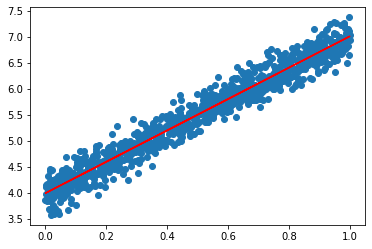

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X_0,y)
plt.plot(X_0,np.matmul(X,W),"r")

#data FISH

In [ ]:
#đọc file bằng pandas
df=pd.read_csv("https://raw.githubusercontent.com/huynhthanh98/ML/master/lab-02/Fish.csv")

print(df.head())

X_0 = df['Height'].values.reshape(-1,1)
y = df['Weight'].values  
y = y.reshape(-1,1) 

  Species  Weight  Length1  Length2  Length3   Height   Width
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340


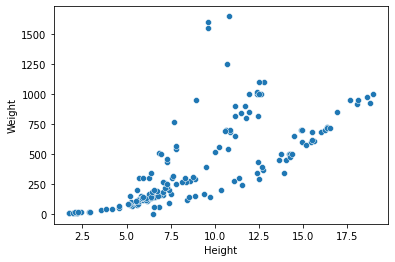

In [ ]:
#Vẽ thử
sns.scatterplot(x="Height",y="Weight",data=df)

In [ ]:
#Khởi tạo lr
np.random.seed(1)
lr= 0.0001  
#Khởi tạo W
W=np.asarray([[60], [-144]])
#Thêm một cột cho bias
X=np.concatenate([np.ones([X_0.shape[0],1]),X_0],axis=1) 
print("shape của X là:", X.shape)
print()
#GD
for i in range(1000000):#gồm 10 vòng lặp
  prediction=np.matmul(X,W)
  loss=prediction-y
  gradient=np.matmul(X.T,loss)
  W=W-lr*(1/X.shape[0])*gradient
  if i % 1000 == 0:
      loss = np.mean(np.square(np.matmul(X,W)-y))
      print("Loss at iter {}: {}".format(i, loss))
loss=np.mean(np.square(np.matmul(X,W)-y))
print("Final loss: ", loss)
print("Final W: ", W)




shape của X là: (159, 2)

Loss at iter 0: 3413769.068199041
Loss at iter 1000: 69247.4894351346
Loss at iter 2000: 68933.50588764231
Loss at iter 3000: 68630.83624712928
Loss at iter 4000: 68339.0664933832
Loss at iter 5000: 68057.80409436366
Loss at iter 6000: 67786.67065408571
Loss at iter 7000: 67525.3014035453
Loss at iter 8000: 67273.34470997752
Loss at iter 9000: 67030.46160378838
Loss at iter 10000: 66796.32532252216
Loss at iter 11000: 66570.62087125215
Loss at iter 12000: 66353.04459880262
Loss at iter 13000: 66143.30378923217
Loss at iter 14000: 65941.11626802865
Loss at iter 15000: 65746.21002248614
Loss at iter 16000: 65558.32283575299
Loss at iter 17000: 65377.20193405876
Loss at iter 18000: 65202.60364664536
Loss at iter 19000: 65034.29307794489
Loss at iter 20000: 64872.04379156335
Loss at iter 21000: 64715.63750564449
Loss at iter 22000: 64564.863799204875
Loss at iter 23000: 64419.51982904418
Loss at iter 24000: 64279.410056850305
Loss at iter 25000: 64144.34598613233


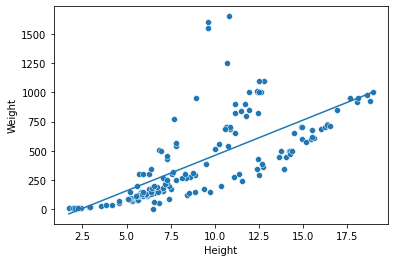

In [ ]:
import seaborn as sns
fig1=sns.scatterplot(x="Height",y="Weight",data=df)
fig2=sns.lineplot(x=df.loc[:,"Height"].values,y=np.matmul(X,W).reshape(-1,))


#Bài tập
1. Dùng 2 thuật toán Gradient Descent còn lại để tìm bộ Weight theo Heigh trong data fish
2. Dùng 3 thuật toán Gradient Descent đã học để tìm bộ Weight theo Height và Width trong data fish
3. Cho biết Weights tốt nhất cho các mô hình trên (Gợi ý: Nên lưu lại từng bộ Weights sau mỗi epoch) (cho câu 2 cả 3 thuật toán)


In [ ]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.loc[:,["Height","Width"]].values,df.loc[:,"Weight"].values,test_size=0.2,random_state=1)
y_train=y_train.reshape(-1,1)
